Import python libraries

In [1]:
import geopandas as gpd
import pandas as pd

Read the dataset (in this case its a shapefile)

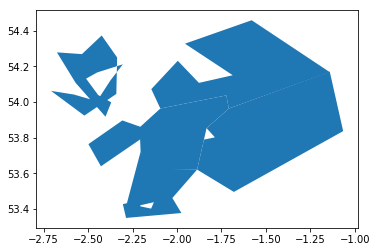

In [6]:
smpl1 = gpd.read_file(r"C:/Users/Lefteris/Desktop/Temp/quality1.shp")
smpl1[:].plot() # you can slice to plot specific parts

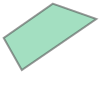

In [44]:
smpl1['geometry'][6]

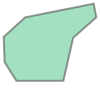

In [59]:
smpl1['geometry'][0]

# Testing the overlaps

In [ ]:
# https://gis.stackexchange.com/questions/230494/intersecting-two-shape-problem-using-geopandas

In [55]:
# test if any overlaps
for i in range(len(smpl1)):
    try:
        print("{} {}".format(i+1,smpl1['geometry'][0].difference(smpl1['geometry'][i])))
    except:
        print(None)

1 GEOMETRYCOLLECTION EMPTY
2 POLYGON ((-2.093653125000008 53.96335833333332, -1.722769791666684 54.03714999999999, -1.708653125000017 53.96335833333332, -1.833778125000014 53.85299166666666, -1.887036458333347 53.62006666666667, -2.14118683845921 53.61977400102696, -2.204661458333339 53.72016666666666, -2.209794791666672 53.85748333333333, -2.093653125000008 53.96335833333332))
3 POLYGON ((-2.093653125000008 53.96335833333332, -1.722769791666684 54.03714999999999, -1.708653125000017 53.96335833333332, -1.833778125000014 53.85299166666666, -1.887036458333347 53.62006666666667, -2.14118683845921 53.61977400102696, -2.204661458333339 53.72016666666666, -2.209794791666672 53.85748333333333, -2.093653125000008 53.96335833333332))
4 POLYGON ((-2.093653125000008 53.96335833333332, -1.722769791666684 54.03714999999999, -1.708653125000017 53.96335833333332, -1.833778125000014 53.85299166666666, -1.887036458333347 53.62006666666667, -2.120080415034894 53.62530919539561, -2.204661458333339 53.720

In [64]:
smpl1.iloc[[0]]

id            Descriptio                                           geometry
0   1  the_starting_polygon  POLYGON ((-2.093653125000008 53.96335833333332...

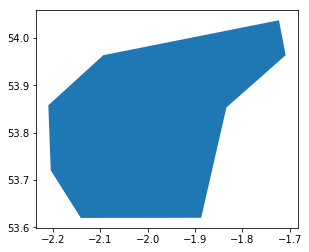

In [91]:
from geopandas.tools import sjoin
first = smpl1.iloc[[0]]
intersections= gpd.sjoin(first, smpl1.iloc[[6]], how="inner", op='intersects')
intersections.plot()

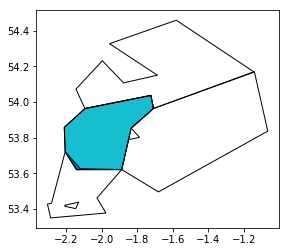

In [95]:
res_intersection = gpd.overlay(first, smpl1[0:4], how='intersection')
ax = res_intersection.plot(cmap='tab10')

first.plot(ax=ax, facecolor='none', edgecolor='k');
smpl1[0:4].plot(ax=ax, facecolor='none', edgecolor='k');

In [9]:
# there is an issue with the Binary Predicates http://geopandas.org/reference.html
for i in range(len(smpl1)):
    try:
        print(smpl1['geometry'][0].intersects(smpl1['geometry'][i]))
    except:
        print(False)

True
True
True
True
False
False
True
True


### building classes

In [18]:
class assess_polygon():
    
    """
    Argument:
        path of the shapefile
    
    Attributes:
        crs: coordinate reference system
    """
    
    
    def __init__(self,path):
        
        # read the path to the shapefile
        gdf = gpd.read_file(path)
        # create an attribute of the coordinate reference system
        self.crs = gdf.crs
        # create the geodataframe
        self.gdf = gdf

    
    def individual_report(self,id_column):

        # create a dataframe out of the geodataframe to store the values
        self.idf = pd.DataFrame(self.gdf[id_column],)
        self.idf['validity'] =  self.gdf.is_valid
        self.idf['geom_type'] =  self.gdf.geom_type
        
        # make a new empty column to test if the polygons are closed
        self.idf['closed ring'] = ""
        for i in range(len(self.gdf)):
            try:
                self.idf['closed ring'].iloc[i] =  self.gdf[i:i+1].is_ring.iloc[0]
            except:
                self.idf['closed ring'].iloc[i] =  False
    
        # make a new empty column to test if the polygons have interior polygons
        self.idf['interior'] = ""
        for i in range(len(self.gdf)):
            try:
                # if the interior gives a list of 0 points then there is no interior ring
                if len(list(self.gdf.interiors[i])) == 0:
                    self.idf['interior'].iloc[i] = False
                else:
                    self.idf['interior'].iloc[i] =  True
            except:
                self.idf['interior'].iloc[i] = False

                
            
        return self.idf
    
    def group_report(self):
        
        # show some basic geometry assessment measurements
        self.grdf = pd.DataFrame(columns = ["all valid geometries","any selfcrossing","any interior","any overlaps"])
        # create a list to store the results of all the measurements
        # the len(list) should be equal to the number of columns
        list_meas = []
        # add the results in the same order as the order of the columns
        if False in self.gdf.is_valid:
             list_meas.append("No")
        if False in self.gdf.is_simple:
             list_meas.append("Yes")
                
        try: 
            self.gdf.interiors
            list_meas.append("Yes")
        except:
            list_meas.append("No")
            
        self.grdf.loc[0]= list_meas
        return self.grdf


In [19]:
new = assess_polygon("C:/Users/Lefteris/Desktop/Temp/quality1.shp")
new.individual_report("id")

C:\Users\Lefteris\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


id  validity geom_type closed ring  interior
0   1      True   Polygon        True     False
1   2      True   Polygon        True     False
2   3      True   Polygon        True     False
3   4      True   Polygon        True      True
4   5     False      None       False     False
5   6     False   Polygon        True     False
6   7      True   Polygon        True     False
7   8      True   Polygon        True     False

In [20]:
new.group_report()

all valid geometries any selfcrossing any interior
0                   No              Yes          Yes

In [ ]:
# dissolve all polygons. loop over each polygon in the multipolygon and check if any interiors. 

TESTING CLASS

In [165]:
class atomo():
    def __init__(self,height,weight):
        self.height = height
        self.weight = weight
        self.arm = 0
        
    
    @property
    def number_arms(self):
        return self.arm
    
    @number_arms.setter
    def number_arms(self,number):
        if number>4:
            raise ValueError('no more than 4')
        else:
            self.arm = number
            return self.arm
    
    def __str__(self):
        return "this is class that has an atomo: {} height, {} weight and {} hands".format(self.height,self.weight,self.arm)

In [166]:
lol = atomo(180,46)

In [167]:
lol.number_arms = 2

In [168]:
lol.arm

2

In [169]:
print(lol)

this is class that has an atomo: 180 height, 46 weight and 2 hands


# Overlay differences between GADM boundaries 

read the shapefile levels

In [48]:
import matplotlib.pyplot
#so we can plot in jupyter
%matplotlib inline 

In [42]:
#shp0 = gpd.read_file(r"C:\Users\Lefteris\Desktop\Data\GADM\gadm python/n_shp0.shp")
shp1 = gpd.read_file(r"C:/Users/Lefteris/Desktop/Temp/n_shp1_state.shp")
shp2 = gpd.read_file(r"C:/Users/Lefteris/Desktop/Temp/n_shp2_counties.shp")

In [43]:
# negative buffer by a little bit so we dont get results of milimeters boundary polygons
shp1['geometry']=shp1['geometry'].buffer(-0.01)

In [44]:
shp1_shp2 = gpd.overlay(shp1,shp2,how='difference')

In [45]:
shp1_shp2

level  lines         title        id    latmin     latmax      lngmin  \
0      1  empty  South Dakota  USA.42_1  42.48111  45.944359 -104.057129   
1      1  empty  South Dakota  USA.42_1  42.48111  45.944359 -104.057129   
2      1  empty  South Dakota  USA.42_1  42.48111  45.944359 -104.057129   

      lngmax parent   poly                        ...                          \
0 -96.436577  USA_0  empty                        ...                           
1 -96.436577  USA_0  empty                        ...                           
2 -96.436577  USA_0  empty                        ...                           

   latmax_2  latmin_2 level_2 lines_2 lngmax_2 lngmin_2 parent_2 poly_2  \
0      None      None    None    None     None     None     None   None   
1      None      None    None    None     None     None     None   None   
2      None      None    None    None     None     None     None   None   

  title_2                                           geometry  
0    None  POLYGON ((-100.716438293457 44.76712036132813,...  
1    None  POLYGON ((-98.72487640380859 45.24589920043957...  
2    None  POLYGON ((-98.80724334716791 43.93545913696295...  

[3 rows x 25 columns]

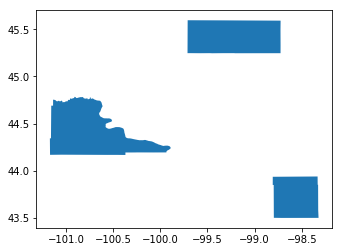

In [46]:
shp1_shp2.plot()

In [ ]:
shp1_shp2.to_file(r"C:\Users\Lefteris\Desktop\bla.shp")